Thành viên:
1. Vũ Trung Nghĩa. MSSV: 20173284
2. Lê Vũ Lợi. MSSV: 20173240
3. Đặng Lâm San. MSSV: 20170111

Chương 5 đã biểu diễn các định nghĩa cơ bản về DataFrame. Trong chương này, chúng ta sẽ tìm hiểu về cách xây dựng các biểu thức, đây là một thành phần quan trọng trong cấu trúc toán tử của Spark. Chúng ta cũng sẽ tìm hiểu về nhiều loại kiểu dữ liệu khác nhau bao gồm:
1. Booleans
2. Numbers
3. Strings
4. Dates and timestamps (kiểu dữ liệu ngày thang)
5. Handling null (Xử lý các thành phần có giá trị null)
6. Complex types (các kiểu dữ liệu phức tap)
7. User-defined functions (Các hàm tự định nghĩa)

In [20]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local) created by __init__ at <ipython-input-2-5796b8bfe42c>:3 

In [24]:
df = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("../data/retail-data/by-day/2010-12-01.csv")
df.printSchema()
df.createOrReplaceTempView("dfTable")

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



In [25]:
df.show(2)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
only showing top 2 rows



# Chuyển sang kiểu dữ liệu Spark
Đây là việc mà chúng ta sẽ làm xuyên suốt chương này. Chúng ta chuyển sang kiểu dữ liệu Spark bằng cách sử dụng hàm lit (lit function) được dưới thiệu ngay sau đây. Hàm này chuyển một kiểu dữ liệu từ một ngôn ngữ khác thành cách biểu diễn tương ứng trong Spark. Dưới đây là cách chuyển một cặp kiểu giá trị của Scala vs Python sang Spark:

In [26]:
from pyspark.sql.functions import lit
df.select(lit(5), lit("five"), lit(5.0)).show()

+---+----+---+
|  5|five|5.0|
+---+----+---+
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
|  5|five|5.0|
+---+----+---+
only showing top 20 rows



In [27]:
df_2 = df.select(lit(5), lit('five'), lit(5.0))

In [28]:
df.count()

3108

# Làm việc với Boolean
Kiểu dữ liệu boolean đóng vai trò rất quan trọng khi phân tích dữ liệu bởi vì nó là cơ sở cho tất cả bộ lọc. Boolean gồm 4 thành phần and, or, true, false. Chúng ta sử dụng cấu trúc đơn giản để xây dựng các câu lệnh và đánh giá nó đúng hay sai. Những câu lệnh này thường được sử dụng như là một điều kiện để kiểm tra xem một hàng dữ liệu có vượt qua test hay không (Chúng có bị bộ lọc lọc ra hay khoong).

In [29]:
from pyspark.sql.functions import col
df.where(col("InvoiceNo") != 536365)\
.select("InvoiceNo", "Description")\
.show(5, False)

+---------+-----------------------------+
|InvoiceNo|Description                  |
+---------+-----------------------------+
|536366   |HAND WARMER UNION JACK       |
|536366   |HAND WARMER RED POLKA DOT    |
|536367   |ASSORTED COLOUR BIRD ORNAMENT|
|536367   |POPPY'S PLAYHOUSE BEDROOM    |
|536367   |POPPY'S PLAYHOUSE KITCHEN    |
+---------+-----------------------------+
only showing top 5 rows



In [30]:
from pyspark.sql.functions import col
df.where(col("InvoiceNo") != 536365)\
.select("InvoiceNo", "Description")\
.show(5, True)

+---------+--------------------+
|InvoiceNo|         Description|
+---------+--------------------+
|   536366|HAND WARMER UNION...|
|   536366|HAND WARMER RED P...|
|   536367|ASSORTED COLOUR B...|
|   536367|POPPY'S PLAYHOUSE...|
|   536367|POPPY'S PLAYHOUSE...|
+---------+--------------------+
only showing top 5 rows



Một cách khác - có thể trông dễ hiểu hơn - là biểu diễn biểu thức dưới dạng một string. Ta có thể sử dụng cách này đối với Python và Scala

In [31]:
df.where("InvoiceNo = 536365").show(5, False)
df.where("InvoiceNo <> 536365").show(5, False)

+---------+---------+-----------------------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate        |UnitPrice|CustomerID|Country       |
+---------+---------+-----------------------------------+--------+-------------------+---------+----------+--------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |2010-12-01 08:26:00|2.55     |17850.0   |United Kingdom|
|536365   |71053    |WHITE METAL LANTERN                |6       |2010-12-01 08:26:00|3.39     |17850.0   |United Kingdom|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |2010-12-01 08:26:00|2.75     |17850.0   |United Kingdom|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |2010-12-01 08:26:00|3.39     |17850.0   |United Kingdom|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEART.     |6       |2010-12-01 08:26:00|3.39     |17850.0   |United Kingdom|
+---------+-----

In [32]:
df.where("Description like 'HAND WARMER%'").show(5, False)

+---------+---------+-------------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description              |Quantity|InvoiceDate        |UnitPrice|CustomerID|Country       |
+---------+---------+-------------------------+--------+-------------------+---------+----------+--------------+
|536366   |22633    |HAND WARMER UNION JACK   |6       |2010-12-01 08:28:00|1.85     |17850.0   |United Kingdom|
|536366   |22632    |HAND WARMER RED POLKA DOT|6       |2010-12-01 08:28:00|1.85     |17850.0   |United Kingdom|
|536372   |22632    |HAND WARMER RED POLKA DOT|6       |2010-12-01 09:01:00|1.85     |17850.0   |United Kingdom|
|536372   |22633    |HAND WARMER UNION JACK   |6       |2010-12-01 09:01:00|1.85     |17850.0   |United Kingdom|
|536377   |22632    |HAND WARMER RED POLKA DOT|6       |2010-12-01 09:34:00|1.85     |17850.0   |United Kingdom|
+---------+---------+-------------------------+--------+-------------------+---------+----------

Như đã đề cập ở trên, chúng ta có thể sử dụng biểu thức boolean gồm nhiều thành phần khi sử dụng and hoặc or. Trong Spark, bạn phải luôn luôn xâu chuỗi chúng lại một cách tuần tự. 

Lý do cho việc phải xâu chuỗi chúng lại một cách tuần tự là bởi vì spark sẽ trải đều các bieru thức một cách tường minh và thực hiện chúng cùng một lúc. Mặc dù bạn có thể chỉ định các câu lệnh của mình một cách rõ ràng bằng cách sử dụng và nếu bạn muốn, chúng thường dễ hiểu và dễ đọc hơn nếu bạn chỉ định chúng theo thứ tự. hoặc các câu lệnh cần được chỉ định trong cùng một câu lệnh:


In [33]:
# in Python
from pyspark.sql.functions import instr
priceFilter = col("UnitPrice") > 600
descripFilter = instr(df.Description, "POSTAGE") >= 1
df.where(df.StockCode.isin("DOT")).where(priceFilter | descripFilter).show()
#-- in SQL
#SELECT * FROM dfTable WHERE StockCode in ("DOT") AND(UnitPrice > 600 OR
#instr(Description, "POSTAGE") >= 1)

+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|   Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|   536544|      DOT|DOTCOM POSTAGE|       1|2010-12-01 14:32:00|   569.77|      null|United Kingdom|
|   536592|      DOT|DOTCOM POSTAGE|       1|2010-12-01 17:06:00|   607.49|      null|United Kingdom|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+



In [34]:
spark.sql('SELECT * FROM dfTable WHERE StockCode in ("DOT") \
          AND(UnitPrice > 600 OR instr(Description, "POSTAGE") >= 1)').show(2)

+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|   Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|   536544|      DOT|DOTCOM POSTAGE|       1|2010-12-01 14:32:00|   569.77|      null|United Kingdom|
|   536592|      DOT|DOTCOM POSTAGE|       1|2010-12-01 17:06:00|   607.49|      null|United Kingdom|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+



Biểu thức Boolean không chỉ dành riêng cho các bộ lọc. Để lọc DataFrame, bạn cũng có thể chỉ định một cột Boolean

In [35]:
from pyspark.sql.functions import instr
DOTCodeFilter = col("StockCode") == "DOT"
priceFilter = col("UnitPrice") > 600
descripFilter = instr(col("Description"), "POSTAGE") >= 1
df.withColumn("isExpensive", DOTCodeFilter & (priceFilter | descripFilter))\
.where("isExpensive")\
.select("unitPrice", "isExpensive").show(5)
#-- in SQL
#SELECT UnitPrice, (StockCode = 'DOT' AND
#(UnitPrice > 600 OR instr(Description, "POSTAGE") >= 1)) as isExpensive
#FROM dfTable
#WHERE (StockCode = 'DOT' AND
#(UnitPrice > 600 OR instr(Description, "POSTAGE") >= 1))

+---------+-----------+
|unitPrice|isExpensive|
+---------+-----------+
|   569.77|       true|
|   607.49|       true|
+---------+-----------+



Chú ý chúng ta không cần chỉ đỉnh bộ lọc như một biểu thức mà chúng ta có thể sử dụng tên các cột mà không cần làm thêm thao tác nào.
Nếu bạn đã từng sử dụng SQL, thì những câu lệnh dưới đâu khá là quen thuộc. Thêm vào đó, chúng được truyền vào mệnh đề where. Thực tế, cách sử dụng như thế này dễ dàng hơn dử dụng Dataframe interface và Spark SQL. 

In [36]:
from pyspark.sql.functions import expr
df.withColumn("isExpensive", expr("NOT UnitPrice <= 250"))\
.where("isExpensive")\
.select("Description", "UnitPrice").show(5)

+--------------+---------+
|   Description|UnitPrice|
+--------------+---------+
|DOTCOM POSTAGE|   569.77|
|DOTCOM POSTAGE|   607.49|
+--------------+---------+



Như đã đề cập ở trên, chúng ta có thể sử dụng biểu thức boolean gồm nhiều thành phần khi sử dụng and hoặc or. Trong Spark, bạn phải luôn luôn xâu chuỗi chúng lại một cách tuần tự. 

Lý do cho việc phải xâu chuỗi chúng lại một cách tuần tự là bởi vì spark sẽ trải đều các bieru thức một cách tường minh và thực hiện chúng cùng một lúc. Mặc dù bạn có thể chỉ định các câu lệnh của mình một cách rõ ràng bằng cách sử dụng và nếu bạn muốn, chúng thường dễ hiểu và dễ đọc hơn nếu bạn chỉ định chúng theo thứ tự. hoặc các câu lệnh cần được chỉ định trong cùng một câu lệnh:


In [37]:
df.where(col("Description").eqNullSafe("hello")).show()

+---------+---------+-----------+--------+-----------+---------+----------+-------+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+-----------+--------+-----------+---------+----------+-------+
+---------+---------+-----------+--------+-----------+---------+----------+-------+



In [38]:
df.where(col("Description") == "hello").show()

+---------+---------+-----------+--------+-----------+---------+----------+-------+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+-----------+--------+-----------+---------+----------+-------+
+---------+---------+-----------+--------+-----------+---------+----------+-------+



In [40]:

df.where(col("Description").eqNullSafe("DOTCOM POSTAGE")).show()
df.where(col("Description" == "DOTCOM POSTAGE")).show()

+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|   Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|   536544|      DOT|DOTCOM POSTAGE|       1|2010-12-01 14:32:00|   569.77|      null|United Kingdom|
|   536592|      DOT|DOTCOM POSTAGE|       1|2010-12-01 17:06:00|   607.49|      null|United Kingdom|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+



Py4JError: An error occurred while calling z:org.apache.spark.sql.functions.col. Trace:
py4j.Py4JException: Method col([class java.lang.Boolean]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:318)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:339)
	at py4j.Gateway.invoke(Gateway.java:276)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:834)



# Làm việc với kiểu dữ liệu số
Khi làm việc với dữ liệu lớn, tác vụ thường được chạy thứ hai sau bộ lọc là đếm. Trong hầu hết trường hợp, chúng ta chỉ cần diễn tả cách tính toán.
Ví dụ sau đây mô tả cách sử dụng. Giá sử dữ liệu đã ghi sai số lượng trong tập dữ liệu bán lẻ của mình và số lương thực = số lượng hiện tại * đơn giá + 5

In [41]:
from pyspark.sql.functions import expr, pow
fabricatedQuantity = pow(col("Quantity") * col("UnitPrice"), 2) + 5
df.select(expr("CustomerId"), fabricatedQuantity.alias("realQuantity")).show(2)

+----------+------------------+
|CustomerId|      realQuantity|
+----------+------------------+
|   17850.0|239.08999999999997|
|   17850.0|          418.7156|
+----------+------------------+
only showing top 2 rows




Lưu ý rằng chúng ta có thể nhân các cột của mình với nhau vì chúng đều là số.
Đương nhiên, chúng ta cũng có thể cộng và trừ khi cần thiết. Trên thực tế, chúng ta có thể làm tất cả những điều này dưới dạng SQL
biểu thức, cũng như

In [42]:
# in Python
df.selectExpr(
"CustomerId",
"(POWER((Quantity * UnitPrice), 2.0) + 5) as realQuantity").show(2)
#-- in SQL
#SELECT customerId, (POWER((Quantity * UnitPrice), 2.0) + 5) as realQuantity
#FROM dfTable

+----------+------------------+
|CustomerId|      realQuantity|
+----------+------------------+
|   17850.0|239.08999999999997|
|   17850.0|          418.7156|
+----------+------------------+
only showing top 2 rows



Một nhiệm vụ đối với kiểu dữ liệu số phổ biến khác là làm tròn. Nếu bạn chỉ muốn làm tròn đến một số nguyên,
đôi khi bạn có thể truyền giá trị thành một số nguyên và điều đó sẽ hoạt động tốt. Tuy nhiên, Spark cũng
có nhiều chức năng chi tiết hơn để thực hiện điều này một cách rõ ràng và ở một mức độ chính xác nhất định. Trong
ví dụ sau, chúng tôi làm tròn đến một chữ số thập phân:

Theo mặc định, hàm làm tròn sẽ làm tròn nếu bạn chính xác ở giữa hai số. Bạn có thể
làm tròn bằng cách sử dụng bround:

In [17]:
from pyspark.sql.functions import lit, round, bround
df.select(round(lit("2.5")), bround(lit("2.5"))).show(2)
#-- in SQL
#SELECT round(2.5), bround(2.5)

+-------------+--------------+
|round(2.5, 0)|bround(2.5, 0)|
+-------------+--------------+
|          3.0|           2.0|
|          3.0|           2.0|
+-------------+--------------+
only showing top 2 rows



Một nhiệm vụ đối với kiểu dữ liệu số khác là tính toán mối tương quan của hai cột. Ví dụ, chúng ta có thể thấy
hệ số tương quan Pearson cho hai cột để xem liệu những thứ rẻ hơn thường được mua
với số lượng lớn hơn. Chúng ta có thể làm điều này thông qua một chức năng cũng như thông qua DataFrame
phương pháp thống kê:

In [43]:
# in Python
from pyspark.sql.functions import corr
df.stat.corr("Quantity", "UnitPrice")
df.select(corr("Quantity", "UnitPrice")).show()
#-- in SQL
#SELECT corr(Quantity, UnitPrice) FROM dfTable

+-------------------------+
|corr(Quantity, UnitPrice)|
+-------------------------+
|     -0.04112314436835551|
+-------------------------+




Một nhiệm vụ phổ biến khác là tính toán thống kê tóm tắt cho một cột hoặc tập hợp các cột. Chúng ta có thể sử dụng phương pháp mô tả để đạt được chính xác điều này. Thao tác này sẽ lấy tất cả các cột số và tính toán số lượng, giá trị trung bình, độ lệch chuẩn, tối thiểu và tối đa. Bạn nên sử dụng điều này chủ yếu để xem trong bảng điều khiển vì lược đồ có thể thay đổi trong tương lai:

In [44]:
df.describe().show()

+-------+-----------------+------------------+--------------------+------------------+-------------------+------------------+------------------+--------------+
|summary|        InvoiceNo|         StockCode|         Description|          Quantity|        InvoiceDate|         UnitPrice|        CustomerID|       Country|
+-------+-----------------+------------------+--------------------+------------------+-------------------+------------------+------------------+--------------+
|  count|             3108|              3108|                3098|              3108|               3108|              3108|              1968|          3108|
|   mean| 536516.684944841|27834.304044117645|                null| 8.627413127413128|               null| 4.151946589446603|15661.388719512195|          null|
| stddev|72.89447869788873|17407.897548583845|                null|26.371821677029203|               null|15.638659854603892|1854.4496996893627|          null|
|    min|           536365|             

Nếu bạn cần những con số chính xác này, bạn cũng có thể tự thực hiện điều này dưới dạng tổng hợp bằng cách
nhập các chức năng và áp dụng chúng cho các cột bạn cần

In [45]:
from pyspark.sql.functions import count, mean, stddev_pop, min, max

In [46]:
df.select(mean(col('UnitPrice'))).show()
df.select(count(col('UnitPrice'))).show()

+-----------------+
|   avg(UnitPrice)|
+-----------------+
|4.151946589446603|
+-----------------+

+----------------+
|count(UnitPrice)|
+----------------+
|            3108|
+----------------+



There are a number of statistical functions available in the StatFunctions Package (accessible
using stat as we see in the code block below). These are DataFrame methods that you can use
to calculate a variety of different things. For instance, you can calculate either exact or
approximate quantiles of your data using the approxQuantile method:

In [39]:
colName = "UnitPrice"
quantileProbs = [0.5]
relError = 0.05
df.stat.approxQuantile("UnitPrice", quantileProbs, relError) # 2.51

[2.51]


Bạn cũng có thể sử dụng công cụ này để xem bảng kê chéo hoặc các cặp mục thường xuyên (hãy cẩn thận, kết quả này sẽ
lớn và bị bỏ qua vì lý do này):

In [47]:
df.stat.crosstab("StockCode", "Quantity").show(1)

+------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|StockCode_Quantity| -1|-10|-12| -2|-24| -3| -4| -5| -6| -7|  1| 10|100| 11| 12|120|128| 13| 14|144| 15| 16| 17| 18| 19|192|  2| 20|200| 21|216| 22| 23| 24| 25|252| 27| 28|288|  3| 30| 32| 33| 34| 36|384|  4| 40|432| 47| 48|480|  5| 50| 56|  6| 60|600| 64|  7| 70| 72|  8| 80|  9| 96|
+------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|             22578|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 

In [48]:
df.stat.freqItems(["StockCode", "Quantity"]).show()

+--------------------+--------------------+
| StockCode_freqItems|  Quantity_freqItems|
+--------------------+--------------------+
|[90214E, 20728, 2...|[200, 128, 23, 32...|
+--------------------+--------------------+



Lưu ý cuối cùng, chúng ta cũng có thể thêm một ID duy nhất vào mỗi hàng bằng cách sử dụng hàm monotouality_increasing_id. Hàm này tạo ra một giá trị duy nhất cho mỗi hàng, bắt đầu bằng 0:

In [49]:
# in Python
from pyspark.sql.functions import monotonically_increasing_id
df.select(monotonically_increasing_id().alias('ID')).show(2)

+---+
| ID|
+---+
|  0|
|  1|
+---+
only showing top 2 rows



Có các chức năng được thêm vào mỗi bản phát hành, vì vậy hãy kiểm tra tài liệu để biết thêm phương pháp. Đối với
chẳng hạn, có một số công cụ tạo dữ liệu ngẫu nhiên (ví dụ: rand (), randn ()) mà bạn
có thể tạo dữ liệu ngẫu nhiên; tuy nhiên, có những vấn đề về thuyết xác định tiềm ẩn khi làm như vậy.
(Bạn có thể tìm thấy các cuộc thảo luận về những thách thức này trong danh sách gửi thư Spark.) Ngoài ra còn có
số lượng tác vụ nâng cao hơn như các thuật toán phác thảo và lọc hoa có sẵn trong
gói stat mà chúng tôi đã đề cập (và liên kết với) ở đầu chương này. Hãy chắc chắn để tìm kiếm
tài liệu API để biết thêm thông tin và chức năng.

# làm việc với kiểu dữ liệu xâu

Gần như đều phải thao tác xử lý với xâu đối với hầu hết các luồng lữ liệu.  Bạn có thể đang thao tác các tệp nhật ký thực hiện trích xuất biểu thức chính quy hoặc
thay thế, hoặc kiểm tra sự tồn tại của chuỗi đơn giản, hoặc viết hoa tất cả các chuỗi hoặc
chữ thường.

Hãy bắt đầu với nhiệm vụ cuối cùng vì đây là nhiệm vụ đơn giản nhất. Hàm initcap sẽ
viết hoa mọi từ trong một chuỗi nhất định khi từ đó được ngăn cách với từ khác bằng dấu cách.

In [50]:
# in Python
from pyspark.sql.functions import initcap
df.select(initcap(col("Description")), col('Description')).show()
#-- in SQL
#SELECT initcap(Description) FROM dfTable

+--------------------+--------------------+
|initcap(Description)|         Description|
+--------------------+--------------------+
|White Hanging Hea...|WHITE HANGING HEA...|
| White Metal Lantern| WHITE METAL LANTERN|
|Cream Cupid Heart...|CREAM CUPID HEART...|
|Knitted Union Fla...|KNITTED UNION FLA...|
|Red Woolly Hottie...|RED WOOLLY HOTTIE...|
|Set 7 Babushka Ne...|SET 7 BABUSHKA NE...|
|Glass Star Froste...|GLASS STAR FROSTE...|
|Hand Warmer Union...|HAND WARMER UNION...|
|Hand Warmer Red P...|HAND WARMER RED P...|
|Assorted Colour B...|ASSORTED COLOUR B...|
|Poppy's Playhouse...|POPPY'S PLAYHOUSE...|
|Poppy's Playhouse...|POPPY'S PLAYHOUSE...|
|Feltcraft Princes...|FELTCRAFT PRINCES...|
|Ivory Knitted Mug...|IVORY KNITTED MUG...|
|Box Of 6 Assorted...|BOX OF 6 ASSORTED...|
|Box Of Vintage Ji...|BOX OF VINTAGE JI...|
|Box Of Vintage Al...|BOX OF VINTAGE AL...|
|Home Building Blo...|HOME BUILDING BLO...|
|Love Building Blo...|LOVE BUILDING BLO...|
|Recipe Box With M...|RECIPE BOX

Như đã đề cập ở trên, bạn có thể chuyển xâu thành in hoa, chữ thường.

In [51]:
from pyspark.sql.functions import lower, upper
df.select(col("Description"),
lower(col("Description")),
upper(lower(col("Description")))).show(2)
#-- in SQL
#SELECT Description, lower(Description), Upper(lower(Description)) FROM dfTable

+--------------------+--------------------+-------------------------+
|         Description|  lower(Description)|upper(lower(Description))|
+--------------------+--------------------+-------------------------+
|WHITE HANGING HEA...|white hanging hea...|     WHITE HANGING HEA...|
| WHITE METAL LANTERN| white metal lantern|      WHITE METAL LANTERN|
+--------------------+--------------------+-------------------------+
only showing top 2 rows



Một nhiệm vụ nhỏ khác là thêm hoặc xóa khoảng trắng xung quanh một chuỗi. Bạn có thể làm điều này bằng cách sử dụng lpad, ltrim, rpad và rtrim, trim:

In [52]:
# in Python
from pyspark.sql.functions import lit, ltrim, rtrim, rpad, lpad, trim
df.select(
ltrim(lit(" HELLO ")).alias("ltrim"),
rtrim(lit(" HELLO ")).alias("rtrim"),
trim(lit(" HELLO ")).alias("trim"),
lpad(lit("HELLO"), 3, " ").alias("lp"),
rpad(lit("HELLO"), 10, " ").alias("rp")).show(2)
#-- in SQL
#SELECT
#ltrim(' HELLLOOOO '),
#rtrim(' HELLLOOOO '),
#trim(' HELLLOOOO '),
#lpad('HELLOOOO ', 3, ' '),
#rpad('HELLOOOO ', 10, ' ')
#FROM dfTable

+------+------+-----+---+----------+
| ltrim| rtrim| trim| lp|        rp|
+------+------+-----+---+----------+
|HELLO | HELLO|HELLO|HEL|HELLO     |
|HELLO | HELLO|HELLO|HEL|HELLO     |
+------+------+-----+---+----------+
only showing top 2 rows



In [53]:
df.select(
ltrim(lit(" HELLO ")).alias("ltrim")).show(2)

+------+
| ltrim|
+------+
|HELLO |
|HELLO |
+------+
only showing top 2 rows



Lưu ý rằng nếu lpad hoặc rpad lấy một số nhỏ hơn độ dài của chuỗi, nó sẽ luôn bị xóa
giá trị từ phía bên phải của chuỗi.
## Biểu thức Chính quy
Có lẽ một trong những tác vụ được thực hiện thường xuyên nhất là tìm kiếm sự tồn tại của một chuỗi
trong một chuỗi khác hoặc thay thế tất cả các đề cập của một chuỗi bằng một giá trị khác. Điều này thường được thực hiện với một công cụ
được gọi là biểu thức chính quy tồn tại trong nhiều ngôn ngữ lập trình. Biểu thức chính quy cho
người dùng có khả năng chỉ định một bộ quy tắc để sử dụng để trích xuất các giá trị từ một chuỗi hoặc thay thế
chúng với một số giá trị khác.

Spark tận dụng sức mạnh hoàn toàn của biểu thức chính quy Java. Java thông thường
cú pháp biểu thức hơi khác với các ngôn ngữ lập trình khác, vì vậy nó đáng xem xét
trước khi đưa bất cứ thứ gì vào sản xuất. Có hai chức năng chính trong Spark mà bạn cần
để thực hiện các tác vụ biểu thức chính quy: regexp_extract và regexp_replace. Những
các hàm trích xuất giá trị và thay thế giá trị tương ứng.

Hãy khám phá cách sử dụng hàm regexp_replace để thay thế các tên màu thay thế trong
cột mô tả:

In [54]:
# in Python
from pyspark.sql.functions import regexp_replace
regex_string = "BLACK|WHITE|RED|GREEN|BLUE"
df.select(
regexp_replace(col("Description"), regex_string, "COLOR").alias("color_clean"),
col("Description")).show(2)
#-- in SQL
#SELECT
#regexp_replace(Description, 'BLACK|WHITE|RED|GREEN|BLUE', 'COLOR') as
#color_clean, Description
#FROM dfTable

+--------------------+--------------------+
|         color_clean|         Description|
+--------------------+--------------------+
|COLOR HANGING HEA...|WHITE HANGING HEA...|
| COLOR METAL LANTERN| WHITE METAL LANTERN|
+--------------------+--------------------+
only showing top 2 rows



Một nhiệm vụ khác có thể là thay thế các ký tự đã cho bằng các ký tự khác. Việc xây dựng biểu thức này như một biểu thức chính quy có thể khá tẻ nhạt, vì vậy Spark cũng cung cấp hàm dịch để thay thế các giá trị này. Điều này được thực hiện ở cấp độ ký tự và sẽ thay thế tất cả các trường hợp của một ký tự bằng ký tự được lập chỉ mục trong chuỗi thay thế:

In [55]:
# in Python
from pyspark.sql.functions import translate
df.select(translate(col("Description"), "LEET", "1357"),col("Description"))\
.show(2)
#-- in SQL
#SELECT translate(Description, 'LEET', '1337'), Description FROM dfTable

+----------------------------------+--------------------+
|translate(Description, LEET, 1357)|         Description|
+----------------------------------+--------------------+
|              WHI73 HANGING H3A...|WHITE HANGING HEA...|
|               WHI73 M37A1 1AN73RN| WHITE METAL LANTERN|
+----------------------------------+--------------------+
only showing top 2 rows




Chúng tôi cũng có thể thực hiện điều gì đó tương tự, chẳng hạn như kéo màu được đề cập đầu tiên:

In [57]:
# in Python a-zA-Z
from pyspark.sql.functions import regexp_extract
extract_str = "(\w{4})"
df.select(
regexp_extract(col("Description"), extract_str, 1).alias("color_clean"),
col("Description")).show(10)
#-- in SQL
#SELECT regexp_extract(Description, '(BLACK|WHITE|RED|GREEN|BLUE)', 1),
#Description
#FROM dfTable

+-----------+--------------------+
|color_clean|         Description|
+-----------+--------------------+
|       WHIT|WHITE HANGING HEA...|
|       WHIT| WHITE METAL LANTERN|
|       CREA|CREAM CUPID HEART...|
|       KNIT|KNITTED UNION FLA...|
|       WOOL|RED WOOLLY HOTTIE...|
|       BABU|SET 7 BABUSHKA NE...|
|       GLAS|GLASS STAR FROSTE...|
|       HAND|HAND WARMER UNION...|
|       HAND|HAND WARMER RED P...|
|       ASSO|ASSORTED COLOUR B...|
+-----------+--------------------+
only showing top 10 rows




Đôi khi, thay vì trích xuất các giá trị, chúng tôi chỉ muốn kiểm tra sự tồn tại của chúng. Chúng tôi có thể làm
điều này với phương thức chứa trên mỗi cột. Điều này sẽ trả về một Boolean tuyên bố liệu
giá trị bạn chỉ định nằm trong chuỗi của cột (Trong Python và SQL, chúng ta có thể sử dụng hàm hướng dẫn):

In [58]:
# in Python
from pyspark.sql.functions import instr
containsBlack = instr(col("Description"), "BLACK") >= 1
containsWhite = instr(col("Description"), "WHITE") >= 1
df.withColumn("hasSimpleColor", containsBlack | containsWhite)\
.where("hasSimpleColor")\
.select("Description").show(3, False)
#-- in SQL
#SELECT Description FROM dfTable
#WHERE instr(Description, 'BLACK') >= 1 OR instr(Description, 'WHITE') >= 1

+----------------------------------+
|Description                       |
+----------------------------------+
|WHITE HANGING HEART T-LIGHT HOLDER|
|WHITE METAL LANTERN               |
|RED WOOLLY HOTTIE WHITE HEART.    |
+----------------------------------+
only showing top 3 rows




Điều này là nhỏ chỉ với hai giá trị, nhưng nó trở nên phức tạp hơn khi có các giá trị.

Hãy giải quyết vấn đề này một cách chặt chẽ hơn và tận dụng khả năng của Spark trong việc chấp nhận một số lượng đối số động. Khi chúng tôi chuyển đổi một danh sách các giá trị thành một tập hợp các đối số và chuyển chúng vào một hàm, chúng tôi sử dụng một tính năng ngôn ngữ gọi là varargs. Sử dụng tính năng này, chúng ta có thể làm sáng tỏ một cách hiệu quả một mảng có độ dài tùy ý và chuyển nó dưới dạng đối số cho một hàm. Điều này, cùng với lựa chọn giúp chúng tôi có thể tạo động các số cột tùy ý:

Trong Python, chúng ta sẽ sử dụng một hàm khác, định vị, trả về vị trí số nguyên (1 vị trí dựa trên). Sau đó, chúng tôi chuyển đổi nó thành Boolean trước khi sử dụng nó như một tính năng cơ bản tương tự:

In [59]:
from pyspark.sql.functions import expr, locate
simpleColors = ["black", "white", "red", "green", "blue"]
def color_locator(column, color_string):
    return locate(color_string.upper(), column)\
    .cast("boolean")\
    .alias("is_" + color_string)
selectedColumns = [color_locator(df.Description, c) for c in simpleColors]
selectedColumns.append(expr("*")) # has to a be Column type
df.select(*selectedColumns).where(expr("is_white OR is_red")).show()

+--------+--------+------+--------+-------+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|is_black|is_white|is_red|is_green|is_blue|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+--------+--------+------+--------+-------+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   false|    true| false|   false|  false|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   false|    true| false|   false|  false|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   false|    true|  true|   false|  false|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   false|   false|  true|   false|  false|   536366|    22632|HAND WARMER RED P...|       6|2010-12

Tính năng đơn giản này thường có thể giúp bạn tạo các cột hoặc bộ lọc Boolean theo cách lập trình trong
cách đơn giản để hiểu và mở rộng. Chúng tôi có thể mở rộng điều này để tính toán
mẫu số chung cho một giá trị đầu vào nhất định hoặc một số có phải là số nguyên tố hay không.
# Làm việc với Ngày và Dấu thời gian
Spark, như chúng ta đã thấy với tập dữ liệu hiện tại của mình, sẽ cố gắng hết sức để
xác định chính xác các loại cột, bao gồm cả ngày tháng và dấu thời gian khi chúng tôi bật InchSchema

Như chúng tôi đã gợi ý trước đó, làm việc với ngày tháng và dấu thời gian liên quan chặt chẽ đến việc làm việc với chuỗi
bởi vì chúng tôi thường lưu trữ dấu thời gian hoặc ngày của mình dưới dạng chuỗi và chuyển đổi chúng thành các loại ngày tại
thời gian chạy. Điều này ít phổ biến hơn khi làm việc với cơ sở dữ liệu và dữ liệu có cấu trúc nhưng nhiều hơn
phổ biến khi chúng tôi làm việc với tệp văn bản và tệp CSV.

Mặc dù Spark sẽ đọc ngày hoặc giờ trên cơ sở cố gắng hết sức. Tuy nhiên, đôi khi sẽ có
không cần phải làm việc với ngày và giờ được định dạng kỳ lạ. Chìa khóa để
hiểu các phép biến đổi mà bạn sẽ cần áp dụng là để đảm bảo rằng bạn biết
chính xác loại và định dạng bạn có ở mỗi bước nhất định. Một "gotcha" phổ biến khác
là lớp TimestampType của Spark chỉ hỗ trợ độ chính xác cấp hai, có nghĩa là nếu
bạn sẽ làm việc với mili giây hoặc micro giây, bạn sẽ cần giải quyết vấn đề này
vấn đề bằng cách có thể hoạt động trên chúng trong thời gian dài. Bất kỳ độ chính xác nào hơn khi ép buộc
TimestampType sẽ bị xóa.

Spark có thể đặc biệt một chút về định dạng bạn có tại bất kỳ thời điểm nào. Nó là
quan trọng là phải rõ ràng khi phân tích cú pháp hoặc chuyển đổi để đảm bảo rằng không có vấn đề gì khi làm như vậy.
Vào cuối ngày, Spark đang làm việc với ngày và dấu thời gian của Java và do đó tuân theo
theo các tiêu chuẩn đó. Hãy bắt đầu với những điều cơ bản và xem ngày hiện tại và
dấu thời gian:

In [62]:
from pyspark.sql.functions import current_date, current_timestamp
dateDF = spark.range(10)\
.withColumn("today", current_date())\
.withColumn("now", current_timestamp())
dateDF.createOrReplaceTempView("dateTable")
dateDF.printSchema()

root
 |-- id: long (nullable = false)
 |-- today: date (nullable = false)
 |-- now: timestamp (nullable = false)




Bây giờ chúng ta có một DataFrame đơn giản để làm việc, hãy cộng và trừ năm ngày kể từ hôm nay.
Các hàm này nhận một cột và sau đó là số ngày để cộng hoặc trừ dưới dạng
tranh luận:

In [63]:
# in Python
from pyspark.sql.functions import date_add, date_sub
dateDF.select(date_sub(col("today"), 5), date_add(col("today"), 5)).show(1)
#-- in SQL
#SELECT date_sub(today, 5), date_add(today, 5) FROM dateTable

+------------------+------------------+
|date_sub(today, 5)|date_add(today, 5)|
+------------------+------------------+
|        2020-12-03|        2020-12-13|
+------------------+------------------+
only showing top 1 row



In [64]:
spark.catalog.listTables()

[Table(name='datetable', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='dftable', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

In [65]:
df.select(expr('*')).show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|2010-12-01 08:26:00|     7.65|   17850.0|United Kingdom|
|   536365|    21730|GLASS S

Một nhiệm vụ phổ biến khác là xem xét sự khác biệt giữa hai ngày. Chúng ta có thể làm điều này với
hàm dateiff sẽ trả về số ngày ở giữa hai ngày. Thông thường chúng tôi
chỉ cần quan tâm đến ngày và vì số ngày thay đổi theo từng tháng nên cũng có
tồn tại một hàm, months_between, cung cấp cho bạn số tháng giữa hai ngày

In [66]:
# in Python
from pyspark.sql.functions import datediff, months_between, to_date
dateDF.withColumn("week_ago", date_sub(col("today"), 7))\
.select(datediff(col("week_ago"), col("today"))).show(1)
dateDF.select(
to_date(lit("2016-01-01")).alias("start"),
to_date(lit("2017-05-22")).alias("end"))\
.select(months_between(col("start"), col("end"))).show(1)
#-- in SQL
#SELECT to_date('2016-01-01'), months_between('2016-01-01', '2017-01-01'),
#datediff('2016-01-01', '2017-01-01')
#FROM dateTable

+-------------------------+
|datediff(week_ago, today)|
+-------------------------+
|                       -7|
+-------------------------+
only showing top 1 row

+--------------------------------+
|months_between(start, end, true)|
+--------------------------------+
|                    -16.67741935|
+--------------------------------+
only showing top 1 row



Lưu ý rằng chúng tôi đã giới thiệu một hàm mới: hàm ngày_năm. Hàm to_date cho phép
bạn có thể chuyển đổi một chuỗi thành một ngày, tùy chọn với định dạng được chỉ định. Chúng tôi chỉ định định dạng của chúng tôi trong
Java SimpleDateFormat sẽ rất quan trọng để tham khảo nếu bạn sử dụng hàm này:

In [67]:
# in Python
from pyspark.sql.functions import to_date, lit
spark.range(5).withColumn("date", lit("2017-01-01"))\
.select(to_date(col("date"))).show(1)

+---------------+
|to_date(`date`)|
+---------------+
|     2017-01-01|
+---------------+
only showing top 1 row



Spark sẽ không báo lỗi nếu nó không thể phân tích cú pháp ngày; đúng hơn, nó sẽ chỉ trả về null. Cái này có thể
hơi khó khăn trong các đường ống lớn hơn vì bạn có thể mong đợi dữ liệu của mình ở một định dạng và
lấy nó trong cái khác. Để minh họa, hãy xem định dạng ngày đã chuyển từ tháng năm-
ngày này sang năm-ngày-tháng. Spark sẽ không phân tích cú pháp ngày này và thay vào đó trả về giá trị null một cách âm thầm:

In [68]:
dateDF.select(to_date(lit("2016-20-12")),to_date(lit("2017-12-11"))).show(1)

+---------------------+---------------------+
|to_date('2016-20-12')|to_date('2017-12-11')|
+---------------------+---------------------+
|                 null|           2017-12-11|
+---------------------+---------------------+
only showing top 1 row



Chúng tôi nhận thấy đây là một tình huống đặc biệt phức tạp đối với lỗi vì một số ngày có thể khớp với
đúng định dạng, trong khi những người khác thì không. Trong ví dụ trước, hãy để ý xem ngày thứ hai
xuất hiện là ngày 11 tháng 12 thay vì ngày chính xác là ngày 12 tháng 11. Spark không ném một
lỗi vì nó không thể biết liệu các ngày có bị trộn lẫn hay không hoặc hàng cụ thể đó không chính xác.

Hãy từng bước khắc phục đường dẫn này và đưa ra một cách hiệu quả để tránh hoàn toàn những vấn đề này.
Bước đầu tiên cần nhớ rằng chúng ta cần chỉ định định dạng ngày của mình theo Java
Chuẩn SimpleDateFormat.

Chúng tôi sẽ sử dụng hai hàm để sửa lỗi này: to_date và to_timestamp. Trước đây tùy chọn
mong đợi một định dạng, trong khi định dạng sau yêu cầu một:

In [69]:
# in Python
from pyspark.sql.functions import to_date
dateFormat = "yyyy-dd-MM"
cleanDateDF = spark.range(1).select(
to_date(lit("2017-12-11"), dateFormat).alias("date"),
to_date(lit("2017-20-12"), dateFormat).alias("date2"))
cleanDateDF.createOrReplaceTempView("dateTable2")
#-- in SQL
#SELECT to_date(date, 'yyyy-dd-MM'), to_date(date2, 'yyyy-dd-MM'), to_date(date)
#FROM dateTable2

In [70]:
spark.sql('Select * from dateTable2').show()

+----------+----------+
|      date|     date2|
+----------+----------+
|2017-11-12|2017-12-20|
+----------+----------+



Bây giờ, hãy sử dụng một ví dụ về to_timestamp, ví dụ này luôn yêu cầu định dạng được chỉ định:

In [71]:
# in Python
from pyspark.sql.functions import to_timestamp
cleanDateDF.select(to_timestamp(col("date"), dateFormat)).show()
#-- in SQL
#SELECT to_timestamp(date, 'yyyy-dd-MM'), to_timestamp(date2, 'yyyy-dd-MM')
#FROM dateTable2

+----------------------------------+
|to_timestamp(`date`, 'yyyy-dd-MM')|
+----------------------------------+
|               2017-11-12 00:00:00|
+----------------------------------+



Sau khi chúng tôi có ngày tháng hoặc dấu thời gian ở định dạng và loại chính xác, việc so sánh giữa chúng sẽ
thực sự khá dễ dàng. Chúng tôi chỉ cần đảm bảo sử dụng loại ngày tháng / dấu thời gian hoặc chỉ định
chuỗi theo đúng định dạng yyyy-MM-dd nếu chúng ta đang so sánh một ngày:

In [72]:
cleanDateDF.filter(col("date2") > lit("2017-12-12")).show()

+----------+----------+
|      date|     date2|
+----------+----------+
|2017-11-12|2017-12-20|
+----------+----------+



Một điểm nhỏ là chúng ta cũng có thể đặt đây là một chuỗi, Spark phân tích cú pháp thành một nghĩa đen:

In [73]:
cleanDateDF.filter(col("date2") > "2017-12-12").show()

+----------+----------+
|      date|     date2|
+----------+----------+
|2017-11-12|2017-12-20|
+----------+----------+



# Làm việc với Null trong Dữ liệu
Cách tốt nhất, bạn nên luôn sử dụng null để biểu thị dữ liệu bị thiếu hoặc trống trong
DataFrames. Spark có thể tối ưu hóa làm việc với giá trị null nhiều hơn có thể nếu bạn sử dụng rỗng
chuỗi hoặc các giá trị khác. Cách chính để tương tác với các giá trị null, ở quy mô DataFrame, là
sử dụng gói con .na trên DataFrame. Ngoài ra còn có một số chức năng để thực hiện
và chỉ định rõ ràng cách Spark sẽ xử lý các giá trị null. Để biết thêm thông tin,
xem Chương 5 (nơi chúng ta thảo luận về đặt hàng), và cũng tham khảo trở lại “Làm việc với Booleans”.

## CẢNH BÁO
Nulls là một phần thách thức của tất cả các lập trình và Spark cũng không phải là ngoại lệ. Theo quan điểm của chúng tôi, là
rõ ràng luôn tốt hơn là ẩn khi xử lý các giá trị null. Ví dụ, trong phần này của
sách, chúng tôi đã thấy cách chúng tôi có thể xác định các cột có kiểu null. Tuy nhiên, điều này đi kèm với một bắt.
Khi chúng tôi khai báo một cột là không có thời gian rỗng, cột đó không thực sự được thực thi. Để nhắc lại, khi
bạn xác định một lược đồ trong đó tất cả các cột được khai báo là không có giá trị null, Spark sẽ không thực thi
đó và sẽ vui vẻ để giá trị null vào cột đó. Tín hiệu nullable chỉ đơn giản là để giúp Spark SQL
tối ưu hóa để xử lý cột đó. Nếu bạn có giá trị null trong các cột không được có giá trị null,
bạn có thể nhận được một kết quả không chính xác hoặc thấy các trường hợp ngoại lệ lạ có thể khó gỡ lỗi.

Có hai điều bạn có thể làm với các giá trị null: bạn có thể loại bỏ các giá trị null một cách rõ ràng hoặc bạn có thể điền
chúng với một giá trị (trên toàn cầu hoặc trên cơ sở mỗi cột). Bây giờ hãy thử nghiệm với từng thứ này.

## Coalesce
Spark bao gồm một chức năng cho phép bạn chọn giá trị không rỗng đầu tiên từ một tập hợp các cột bằng
bằng cách sử dụng hàm liên kết. Trong trường hợp này, không có giá trị null, vì vậy nó chỉ trả về giá trị đầu tiên
cột:

In [74]:
df.select(col("Description"), col("CustomerId")).show(20, False)
import pandas as pd
row = ['Hello', 'world', None, None, 'Luffy']


+-----------------------------------+----------+
|Description                        |CustomerId|
+-----------------------------------+----------+
|WHITE HANGING HEART T-LIGHT HOLDER |17850.0   |
|WHITE METAL LANTERN                |17850.0   |
|CREAM CUPID HEARTS COAT HANGER     |17850.0   |
|KNITTED UNION FLAG HOT WATER BOTTLE|17850.0   |
|RED WOOLLY HOTTIE WHITE HEART.     |17850.0   |
|SET 7 BABUSHKA NESTING BOXES       |17850.0   |
|GLASS STAR FROSTED T-LIGHT HOLDER  |17850.0   |
|HAND WARMER UNION JACK             |17850.0   |
|HAND WARMER RED POLKA DOT          |17850.0   |
|ASSORTED COLOUR BIRD ORNAMENT      |13047.0   |
|POPPY'S PLAYHOUSE BEDROOM          |13047.0   |
|POPPY'S PLAYHOUSE KITCHEN          |13047.0   |
|FELTCRAFT PRINCESS CHARLOTTE DOLL  |13047.0   |
|IVORY KNITTED MUG COSY             |13047.0   |
|BOX OF 6 ASSORTED COLOUR TEASPOONS |13047.0   |
|BOX OF VINTAGE JIGSAW BLOCKS       |13047.0   |
|BOX OF VINTAGE ALPHABET BLOCKS     |13047.0   |
|HOME BUILDING BLOCK

In [75]:
from pyspark.sql.functions import coalesce
df.select(coalesce(col("Description"), col("CustomerId"))).show(20, False)

+-----------------------------------+
|coalesce(Description, CustomerId)  |
+-----------------------------------+
|WHITE HANGING HEART T-LIGHT HOLDER |
|WHITE METAL LANTERN                |
|CREAM CUPID HEARTS COAT HANGER     |
|KNITTED UNION FLAG HOT WATER BOTTLE|
|RED WOOLLY HOTTIE WHITE HEART.     |
|SET 7 BABUSHKA NESTING BOXES       |
|GLASS STAR FROSTED T-LIGHT HOLDER  |
|HAND WARMER UNION JACK             |
|HAND WARMER RED POLKA DOT          |
|ASSORTED COLOUR BIRD ORNAMENT      |
|POPPY'S PLAYHOUSE BEDROOM          |
|POPPY'S PLAYHOUSE KITCHEN          |
|FELTCRAFT PRINCESS CHARLOTTE DOLL  |
|IVORY KNITTED MUG COSY             |
|BOX OF 6 ASSORTED COLOUR TEASPOONS |
|BOX OF VINTAGE JIGSAW BLOCKS       |
|BOX OF VINTAGE ALPHABET BLOCKS     |
|HOME BUILDING BLOCK WORD           |
|LOVE BUILDING BLOCK WORD           |
|RECIPE BOX WITH METAL HEART        |
+-----------------------------------+
only showing top 20 rows



In [76]:
coalesce(col("Description"), col("CustomerId"))

Column<b'coalesce(Description, CustomerId)'>

## xoá
Hàm đơn giản nhất là drop, loại bỏ các hàng có chứa null. Mặc định là bỏ bất kỳ
hàng trong đó bất kỳ giá trị nào là null:

In [77]:
df.na.drop()
df.na.drop("any")

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: string, UnitPrice: double, CustomerID: double, Country: string]


Việc chỉ định "bất kỳ" làm đối số sẽ giảm một hàng nếu bất kỳ giá trị nào là rỗng. Sử dụng “tất cả” sẽ làm giảm
chỉ hàng nếu tất cả các giá trị là null hoặc NaN cho hàng đó:

In [78]:
df.na.drop("all")

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: string, UnitPrice: double, CustomerID: double, Country: string]

Chúng ta cũng có thể áp dụng điều này cho một số tập hợp cột nhất định bằng cách chuyển vào một mảng cột:

In [79]:
df.na.drop("all", subset=["StockCode", "InvoiceNo"])

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: string, UnitPrice: double, CustomerID: double, Country: string]

## lấp đầy
Sử dụng hàm điền, bạn có thể điền vào một hoặc nhiều cột với một bộ giá trị. Điều này có thể thực hiện được
bằng cách chỉ định một bản đồ — đó là một giá trị cụ thể và một tập hợp các cột.
Ví dụ: để điền tất cả các giá trị null trong các cột kiểu Chuỗi, bạn có thể chỉ định như sau:

In [57]:
df.na.fill("All Null values become this string")

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: string, UnitPrice: double, CustomerID: double, Country: string]

Chúng ta có thể làm tương tự đối với các cột kiểu Số nguyên bằng cách sử dụng df.na.fill (5: Integer) hoặc cho
Nhân đôi df.na.fill (5: Nhân đôi). Để chỉ định các cột, chúng tôi chỉ cần chuyển vào một mảng tên cột
như chúng ta đã làm trong ví dụ trước:

In [80]:
df.na.fill("all", subset=["StockCode", "InvoiceNo"])

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: string, UnitPrice: double, CustomerID: double, Country: string]

Chúng tôi cũng có thể làm điều này với Bản đồ Scala, trong đó khóa là tên cột và giá trị là
giá trị mà chúng tôi muốn sử dụng để điền vào các giá trị rỗng:

In [81]:
fill_cols_vals = {"StockCode": 5, "Description" : "No Value"}
df.na.fill(fill_cols_vals)

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: string, UnitPrice: double, CustomerID: double, Country: string]

## thay thế
Ngoài việc thay thế các giá trị null như chúng tôi đã làm bằng thả và lấp đầy, có nhiều
các tùy chọn mà bạn có thể sử dụng với nhiều hơn giá trị rỗng. Có lẽ trường hợp sử dụng phổ biến nhất là
để thay thế tất cả các giá trị trong một cột nhất định theo giá trị hiện tại của chúng. Yêu cầu duy nhất là
rằng giá trị này cùng loại với giá trị ban đầu:

In [82]:
df.na.replace([""], ["UNKNOWN"], "Description")

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: string, UnitPrice: double, CustomerID: double, Country: string]

# Làm việc với các loại phức tạp
Các kiểu phức tạp có thể giúp bạn tổ chức và cấu trúc dữ liệu của mình theo những cách có ý nghĩa hơn
vấn đề mà bạn đang hy vọng giải quyết. Có ba loại phức tạp: cấu trúc, mảng và bản đồ.
## Cấu trúc
Bạn có thể coi cấu trúc là DataFrames trong DataFrames. Một ví dụ đã làm sẽ minh họa
điều này rõ ràng hơn. Chúng ta có thể tạo một cấu trúc bằng cách đặt một tập hợp các cột trong ngoặc đơn trong một truy vấn:

In [83]:
df.selectExpr("(Description, InvoiceNo) as complex", "*")
df.selectExpr("struct(Description, InvoiceNo) as complex", "*")

DataFrame[complex: struct<Description:string,InvoiceNo:string>, InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: string, UnitPrice: double, CustomerID: double, Country: string]

In [84]:
from pyspark.sql.functions import struct
complexDF = df.select(struct("Description", "InvoiceNo").alias("complex"))
complexDF.createOrReplaceTempView("complexDF")

Bây giờ chúng ta có một DataFrame với một phức hợp cột. Chúng tôi có thể truy vấn nó giống như chúng tôi có thể
DataFrame, sự khác biệt duy nhất là chúng tôi sử dụng cú pháp dấu chấm để làm như vậy, hoặc phương thức cột
getField:

In [85]:
complexDF.select("complex.Description")
complexDF.select(col("complex").getField("Description"))

DataFrame[complex.Description: string]

Chúng tôi cũng có thể truy vấn tất cả các giá trị trong cấu trúc bằng cách sử dụng *. Điều này đưa tất cả các cột lên cấp trên cùng
Khung dữ liệu:

In [86]:
complexDF.select("complex.*").show()
complexDF.select(expr('*')).show(10, False)
#-- in SQL
#SELECT complex.* FROM complexDF

+--------------------+---------+
|         Description|InvoiceNo|
+--------------------+---------+
|WHITE HANGING HEA...|   536365|
| WHITE METAL LANTERN|   536365|
|CREAM CUPID HEART...|   536365|
|KNITTED UNION FLA...|   536365|
|RED WOOLLY HOTTIE...|   536365|
|SET 7 BABUSHKA NE...|   536365|
|GLASS STAR FROSTE...|   536365|
|HAND WARMER UNION...|   536366|
|HAND WARMER RED P...|   536366|
|ASSORTED COLOUR B...|   536367|
|POPPY'S PLAYHOUSE...|   536367|
|POPPY'S PLAYHOUSE...|   536367|
|FELTCRAFT PRINCES...|   536367|
|IVORY KNITTED MUG...|   536367|
|BOX OF 6 ASSORTED...|   536367|
|BOX OF VINTAGE JI...|   536367|
|BOX OF VINTAGE AL...|   536367|
|HOME BUILDING BLO...|   536367|
|LOVE BUILDING BLO...|   536367|
|RECIPE BOX WITH M...|   536367|
+--------------------+---------+
only showing top 20 rows

+---------------------------------------------+
|complex                                      |
+---------------------------------------------+
|[WHITE HANGING HEART T-LIGHT HOLDER, 

## Mảng
Để xác định mảng, chúng ta hãy làm việc thông qua một trường hợp sử dụng. Với dữ liệu hiện tại của chúng tôi, mục tiêu của chúng tôi là
từng từ trong cột Mô tả của chúng tôi và chuyển đổi từ đó thành một hàng trong DataFrame của chúng tôi.
Nhiệm vụ đầu tiên là biến cột Mô tả của chúng ta thành một kiểu phức tạp, một mảng.
### tách
Chúng tôi thực hiện việc này bằng cách sử dụng hàm tách và chỉ định dấu phân cách:

In [87]:
from pyspark.sql.functions import split
df.select(split(col("Description"), " ")).show(2)
#-- in SQL
#SELECT split(Description, ' ') FROM dfTable

+-------------------------+
|split(Description,  , -1)|
+-------------------------+
|     [WHITE, HANGING, ...|
|     [WHITE, METAL, LA...|
+-------------------------+
only showing top 2 rows



Điều này khá mạnh mẽ vì Spark cho phép chúng ta điều khiển loại phức tạp này như một loại khác
cột. Chúng tôi cũng có thể truy vấn các giá trị của mảng bằng cú pháp giống Python:

In [88]:
# in Python
df.select(split(col("Description"), " ").alias("array_col"))\
.selectExpr("array_col[0]").show(2)
#-- in SQL
#SELECT split(Description, ' ')[0] FROM dfTable

+------------+
|array_col[0]|
+------------+
|       WHITE|
|       WHITE|
+------------+
only showing top 2 rows



### Độ dài Mảng
Chúng tôi có thể xác định độ dài của mảng bằng cách truy vấn kích thước của nó:

In [89]:
from pyspark.sql.functions import size
df.select(size(split(col("Description"), " "))).show(2) # shows 5 and 3

+-------------------------------+
|size(split(Description,  , -1))|
+-------------------------------+
|                              5|
|                              3|
+-------------------------------+
only showing top 2 rows



### array_contains
Chúng ta cũng có thể xem liệu mảng này có chứa giá trị hay không:

In [90]:
# in Python
from pyspark.sql.functions import array_contains
df.select(array_contains(split(col("Description"), " "), "WHITE")).show(2)
#-- in SQL
#SELECT array_contains(split(Description, ' '), 'WHITE') FROM dfTable

+------------------------------------------------+
|array_contains(split(Description,  , -1), WHITE)|
+------------------------------------------------+
|                                            true|
|                                            true|
+------------------------------------------------+
only showing top 2 rows



Tuy nhiên, điều này không giải quyết được vấn đề hiện tại của chúng tôi. Để chuyển một kiểu phức tạp thành một tập hợp các hàng
(một cho mỗi giá trị trong mảng của chúng ta), chúng ta cần sử dụng hàm bùng nổ.
### phát nổ
Hàm boom lấy một cột bao gồm các mảng và tạo một hàng (với phần còn lại của
các giá trị được nhân đôi) cho mỗi giá trị trong mảng. Hình 6-1 minh họa quy trình.
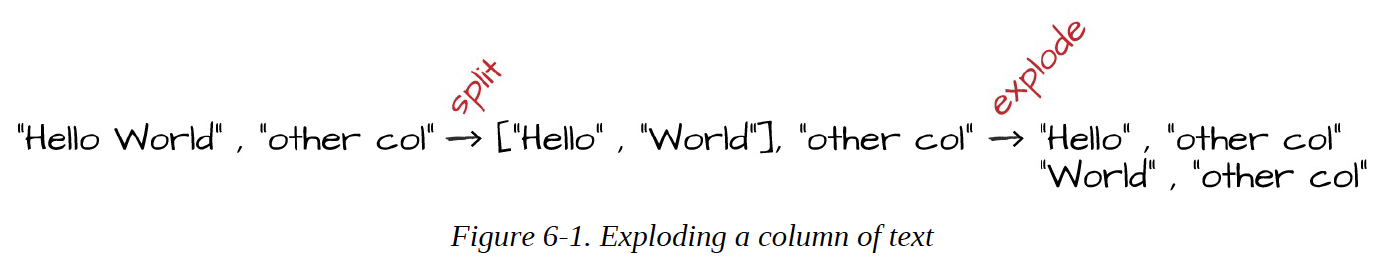

In [91]:
# in Python
from pyspark.sql.functions import split, explode
df.withColumn("splitted", split(col("Description"), " "))\
.withColumn("exploded", explode(col("splitted")))\
.select("Description", "InvoiceNo", "exploded").show(2)
#-- in SQL
#SELECT Description, InvoiceNo, exploded
#FROM (SELECT *, split(Description, " ") as splitted FROM dfTable)
#LATERAL VIEW explode(splitted) as exploded

+--------------------+---------+--------+
|         Description|InvoiceNo|exploded|
+--------------------+---------+--------+
|WHITE HANGING HEA...|   536365|   WHITE|
|WHITE HANGING HEA...|   536365| HANGING|
+--------------------+---------+--------+
only showing top 2 rows



### Bản đồ
Bản đồ được tạo bằng cách sử dụng chức năng bản đồ và các cặp khóa-giá trị của cột. Sau đó, bạn có thể chọn
chúng giống như bạn có thể chọn từ một mảng:

In [92]:
# in Python
from pyspark.sql.functions import create_map
df.select(create_map(col("Description"), col("InvoiceNo")).alias("complex_map"))\
.show(2, False)
#-- in SQL
#SELECT map(Description, InvoiceNo) as complex_map FROM dfTable
#WHERE Description IS NOT NULL

+----------------------------------------------+
|complex_map                                   |
+----------------------------------------------+
|[WHITE HANGING HEART T-LIGHT HOLDER -> 536365]|
|[WHITE METAL LANTERN -> 536365]               |
+----------------------------------------------+
only showing top 2 rows



Bạn có thể truy vấn chúng bằng cách sử dụng khóa thích hợp. Một khóa bị thiếu trả về null:

In [93]:
# in Python
from pyspark.sql.functions import lit, col, create_map
df.select(create_map(df["Description"], df["InvoiceNo"]).alias("complex_map"))\
.selectExpr("complex_map['WHITE METAL LANTERN']").show(2)

+--------------------------------+
|complex_map[WHITE METAL LANTERN]|
+--------------------------------+
|                            null|
|                          536365|
+--------------------------------+
only showing top 2 rows



In [94]:
df.select(create_map(col("Description"), col("InvoiceNo")).alias("complex_map"))\
.selectExpr("explode(complex_map)").show(2)

+--------------------+------+
|                 key| value|
+--------------------+------+
|WHITE HANGING HEA...|536365|
| WHITE METAL LANTERN|536365|
+--------------------+------+
only showing top 2 rows



### Làm việc với JSON
Spark có một số hỗ trợ duy nhất để làm việc với dữ liệu JSON. Bạn có thể thao tác trực tiếp trên chuỗi
của JSON trong Spark và phân tích cú pháp từ JSON hoặc trích xuất các đối tượng JSON. Hãy bắt đầu bằng cách tạo JSON
cột:

In [95]:
jsonDF = spark.range(1).selectExpr("""
'{"myJSONKey" : {"myJSONValue" : [1, 2, 3]}}' as jsonString""")

Bạn có thể sử dụng get_json_object để truy vấn nội tuyến một đối tượng JSON, có thể là từ điển hoặc mảng.
Bạn có thể sử dụng json_tuple nếu đối tượng này chỉ có một mức lồng ghép:

In [96]:
from pyspark.sql.functions import get_json_object, json_tuple
jsonDF.select(
get_json_object(col("jsonString"), "$.myJSONKey.myJSONValue[1]").alias("column"),
json_tuple(col("jsonString"), "myJSONKey")).show(2)

+------+--------------------+
|column|                  c0|
+------+--------------------+
|     2|{"myJSONValue":[1...|
+------+--------------------+



Bạn cũng có thể biến StructType thành một chuỗi JSON bằng cách sử dụng hàm to_json:

In [97]:
from pyspark.sql.functions import to_json
df.selectExpr("(InvoiceNo, Description) as myStruct")\
.select(to_json(col("myStruct")))

DataFrame[to_json(myStruct): string]

Hàm này cũng chấp nhận một từ điển (bản đồ) các tham số giống với dữ liệu JSON
nguồn. Bạn có thể sử dụng hàm from_json để phân tích cú pháp dữ liệu này (hoặc dữ liệu JSON khác) trở lại. Điều này
tự nhiên yêu cầu bạn chỉ định một lược đồ và tùy ý bạn có thể chỉ định một bản đồ các tùy chọn, như
tốt:

In [98]:
from pyspark.sql.functions import from_json
from pyspark.sql.types import *
parseSchema = StructType((
StructField("InvoiceNo",StringType(),True),
StructField("Description",StringType(),True)))
df.selectExpr("(InvoiceNo, Description) as myStruct")\
.select(to_json(col("myStruct")).alias("newJSON"))\
.select(from_json(col("newJSON"), parseSchema), col("newJSON")).show(2)

+--------------------+--------------------+
|  from_json(newJSON)|             newJSON|
+--------------------+--------------------+
|[536365, WHITE HA...|{"InvoiceNo":"536...|
|[536365, WHITE ME...|{"InvoiceNo":"536...|
+--------------------+--------------------+
only showing top 2 rows



# Hàm do Người dùng Xác định
Một trong những điều mạnh mẽ nhất mà bạn có thể làm trong Spark là xác định các chức năng của riêng bạn. Những
các chức năng do người dùng xác định (UDF) giúp bạn có thể viết tùy chỉnh của riêng mình
chuyển đổi bằng Python hoặc Scala và thậm chí sử dụng các thư viện bên ngoài. UDF có thể nhận và trả lại
một hoặc nhiều cột làm đầu vào. Spark UDFs cực kỳ mạnh mẽ vì bạn có thể viết chúng
bằng một số ngôn ngữ lập trình khác nhau; bạn không cần phải tạo chúng theo một định dạng bí truyền
hoặc ngôn ngữ dành riêng cho miền. Chúng chỉ là các chức năng hoạt động trên dữ liệu, ghi lại từng bản ghi.
Theo mặc định, các chức năng này được đăng ký dưới dạng các chức năng tạm thời để được sử dụng trong
SparkSession hoặc Context.

Mặc dù bạn có thể viết UDF bằng Scala, Python hoặc Java, nhưng có những cân nhắc về hiệu suất
mà bạn nên biết. Để minh họa điều này, chúng ta sẽ xem xét chính xác những gì sẽ xảy ra
khi bạn tạo UDF, hãy chuyển nó vào Spark, sau đó thực thi mã bằng UDF đó.

Bước đầu tiên là chức năng thực tế. Chúng tôi sẽ tạo một cái đơn giản cho ví dụ này. Hãy viết một
Hàm power3 nhận một số và nâng nó lên lũy thừa ba:

In [99]:
udfExampleDF = spark.range(5).toDF("num")
def power3(double_value):
    return double_value ** 3
power3(2.0)

8.0

Trong ví dụ nhỏ này, chúng ta có thể thấy rằng các hàm của chúng ta hoạt động như mong đợi. Chúng tôi có thể cung cấp một
đầu vào riêng lẻ và tạo ra kết quả mong đợi (với trường hợp thử nghiệm đơn giản này). Cho đến nay,
kỳ vọng cho đầu vào là cao: nó phải là một kiểu cụ thể và không thể là giá trị rỗng (xem
“Làm việc với Null trong Dữ liệu”).

Bây giờ chúng tôi đã tạo các chức năng này và thử nghiệm chúng, chúng tôi cần đăng ký chúng với Spark để
mà chúng ta có thể sử dụng chúng trên tất cả các máy công nhân của mình. Spark sẽ tuần tự hóa chức năng trên
trình điều khiển và chuyển nó qua mạng cho tất cả các quy trình thực thi. Điều này xảy ra bất kể
ngôn ngữ.

Khi bạn sử dụng hàm, về cơ bản có hai điều khác nhau xảy ra. Nếu chức năng là
được viết bằng Scala hoặc Java, bạn có thể sử dụng nó trong Máy ảo Java (JVM). Điều này có nghĩa rằng
sẽ có ít hình phạt về hiệu suất ngoài thực tế là bạn không thể tận dụng mã
khả năng tạo mà Spark có cho các chức năng tích hợp. Có thể có vấn đề về hiệu suất nếu
bạn tạo hoặc sử dụng rất nhiều đối tượng; chúng tôi đề cập đến vấn đề đó trong phần tối ưu hóa ở Chương 19.

Nếu hàm được viết bằng Python, điều gì đó hoàn toàn khác sẽ xảy ra. Spark bắt đầu một Python
xử lý trên worker, tuần tự hóa tất cả dữ liệu sang định dạng mà Python có thể hiểu được
(hãy nhớ rằng nó đã có trong JVM trước đó), thực thi từng hàng hàm trên dữ liệu đó trong
Xử lý Python, và cuối cùng trả về kết quả của các hoạt động hàng cho JVM và Spark.
Hình 6-2 cung cấp tổng quan về quy trình.
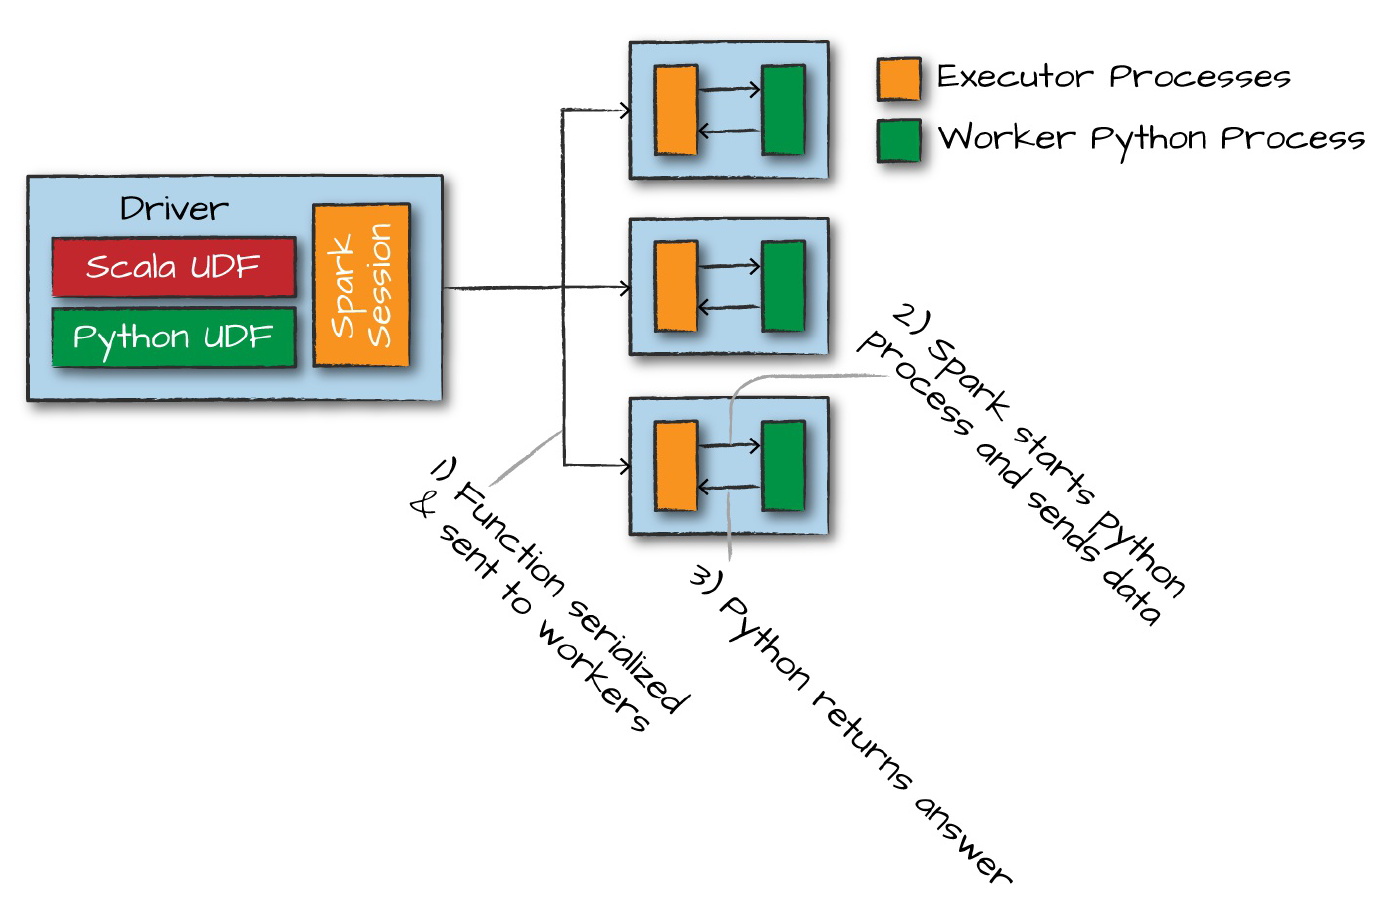
## CẢNH BÁO
Bắt đầu quá trình Python này là tốn kém, nhưng chi phí thực sự là tuần tự hóa dữ liệu sang Python. Đây là
tốn kém vì hai lý do: nó là một tính toán đắt tiền, nhưng cũng có thể, sau khi dữ liệu vào Python, Spark
không thể quản lý bộ nhớ của công nhân. Điều này có nghĩa là bạn có thể khiến nhân viên bị lỗi
nếu nó bị hạn chế tài nguyên (vì cả JVM và Python đều đang cạnh tranh để giành bộ nhớ trên
cùng một máy). Chúng tôi khuyên bạn nên viết UDF của mình bằng Scala hoặc Java — một lượng nhỏ
thời gian bạn cần để viết hàm trong Scala sẽ luôn mang lại tốc độ tăng đáng kể, và
trên hết, bạn vẫn có thể sử dụng hàm từ Python!

Bây giờ bạn đã hiểu về quy trình, hãy làm việc với một ví dụ. Đầu tiên, chúng tôi
cần đăng ký hàm để làm cho nó khả dụng như một hàm DataFrame:

In [115]:
# Python—first, we register it:
# in Python
from pyspark.sql.functions import udf
power3udf = udf(power3)
#Then, we can use it in our DataFrame code:
# in Python
from pyspark.sql.functions import col
udfExampleDF.select(power3udf(col("num"))).show(2)

+-----------+
|power3(num)|
+-----------+
|          0|
|          1|
+-----------+
only showing top 2 rows



# Phần kết luận
Chương này cho thấy việc mở rộng Spark SQL cho các mục đích của riêng bạn dễ dàng như thế nào và làm như vậy trong
một cách không phải là một số ngôn ngữ bí truyền, dành riêng cho từng miền mà là những chức năng đơn giản
dễ dàng kiểm tra và bảo trì mà không cần sử dụng Spark! Đây là một công cụ mạnh mẽ đáng kinh ngạc mà bạn
có thể sử dụng để chỉ định logic nghiệp vụ phức tạp có thể chạy trên năm hàng trên máy cục bộ của bạn
hoặc trên terabyte dữ liệu trên một cụm 100 nút!